Test VAE model on random frame of random file in `record`

In [1]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from vae.vae import ConvVAE, reset_graph

In [2]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"]="" # disable GPU
ROOT = '/data/cvfs/ah2029/datasets/gym/carracing/'

DATA_DIR = os.path.join(ROOT, 'record')
model_path_name = os.path.join(ROOT, 'tf_vae')

beta_vae_name = 'vae_beta_5.0.json'
z_size=32

In [6]:
vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'vae.json'))

beta_vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, beta_vae_name))
beta_vae.load_json(os.path.join(model_path_name, beta_vae_name))

INFO:tensorflow:Model using cpu.
INFO:tensorflow:Model using cpu.


### Compare disentanglement

In [7]:
filelist = os.listdir(DATA_DIR)

In [46]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

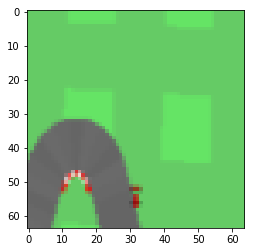

In [64]:
# show recorded frame that will be fed into the input of VAE
frame = random.choice(obs).reshape(1, 64, 64, 3)
plt.imshow(frame[0])

In [79]:
def plot_latent_variations(frame, vae, factor=0):
    batch_z = vae.encode_mu_logvar(frame)[0]#vae.encode(frame)
    print('Latent vector z')
    print(batch_z[0]) # print out sampled z
    reconstruct = vae.decode(batch_z)
    
    plt.figure(figsize=((10, 5)))
    plt.subplot(121)
    plt.imshow(frame[0])
    plt.title('Original')
    # show reconstruction
    plt.subplot(122)
    plt.imshow(reconstruct[0])
    plt.title('Reconstruction')
    plt.show()

    print('Visualise latent factor {}, original value={:.2f}'.format(factor, batch_z[0][factor]))
    batch_z_copy = batch_z.copy()
    plt.figure(figsize=(20, 5))
    for i, value in enumerate(np.linspace(-1.5, 1.5, 10)):
        batch_z_copy[0, factor] = value
        reconstruct = vae.decode(batch_z_copy)
        # show reconstruction
        plt.subplot(1, 10, i+1)
        plt.imshow(reconstruct[0])
        plt.title('{:.2f}'.format(value))
    plt.show()

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


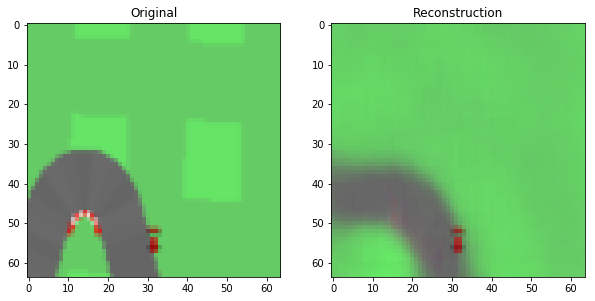

Visualise latent factor 7, original value=0.01


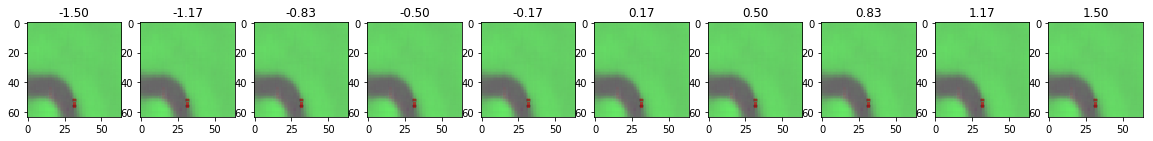

In [83]:
plot_latent_variations(frame, vae, factor=7)

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


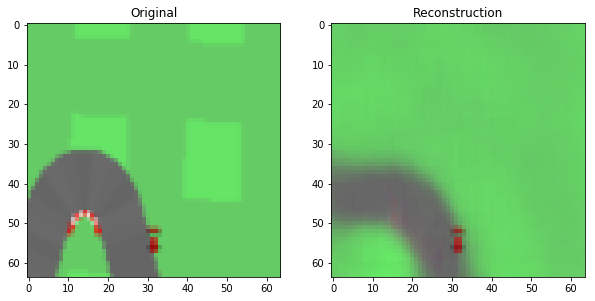

Visualise latent factor 0, original value=-0.00


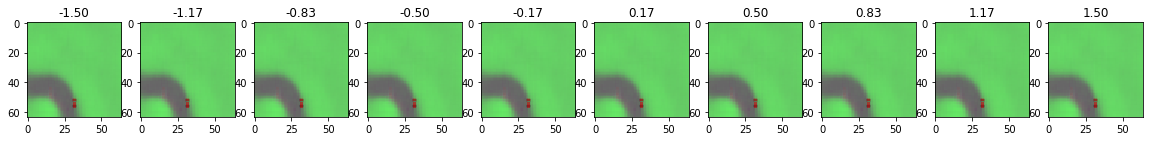

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


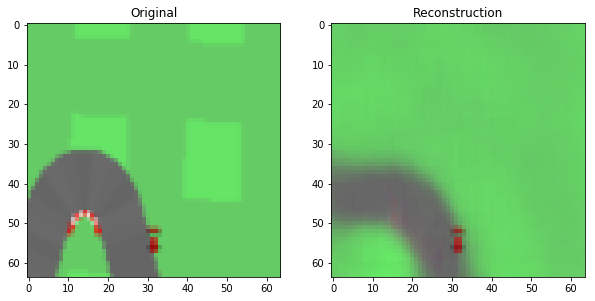

Visualise latent factor 1, original value=-0.02


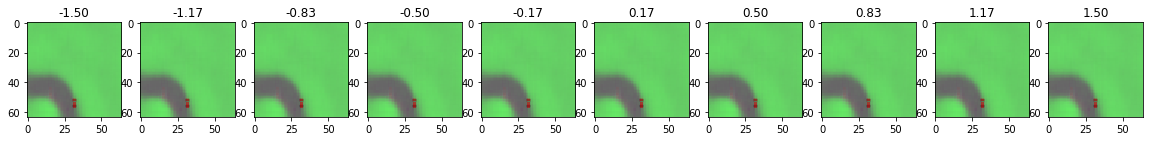

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


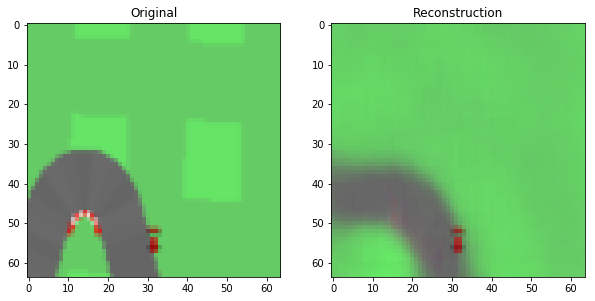

Visualise latent factor 2, original value=-0.02


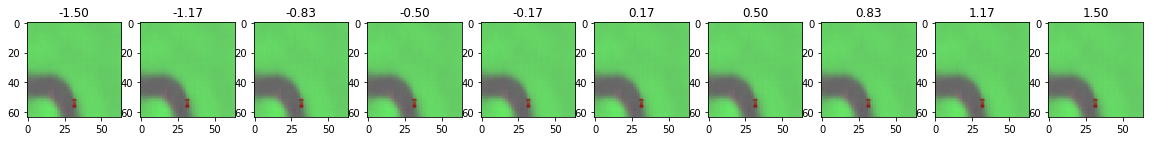

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


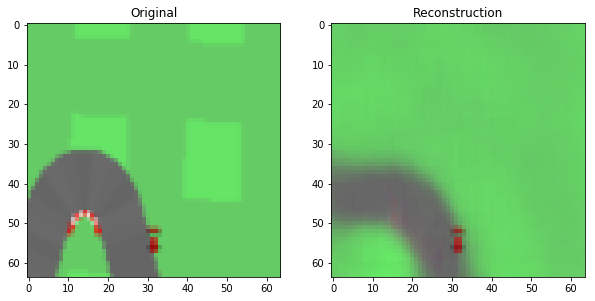

Visualise latent factor 3, original value=-0.01


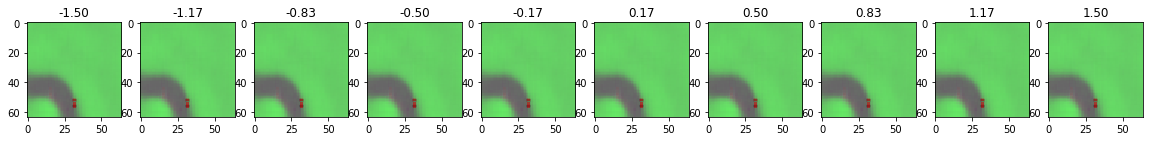

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


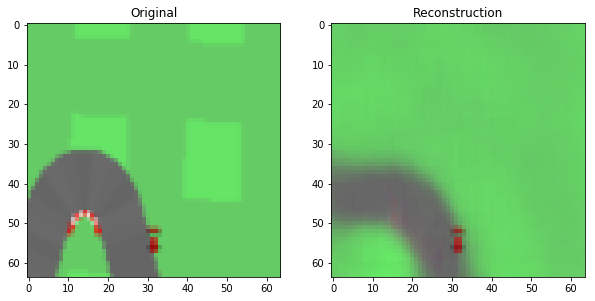

Visualise latent factor 4, original value=-0.03


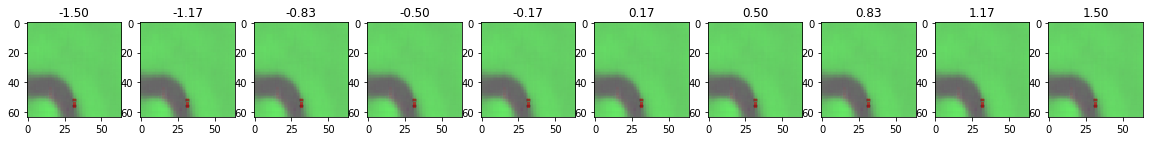

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


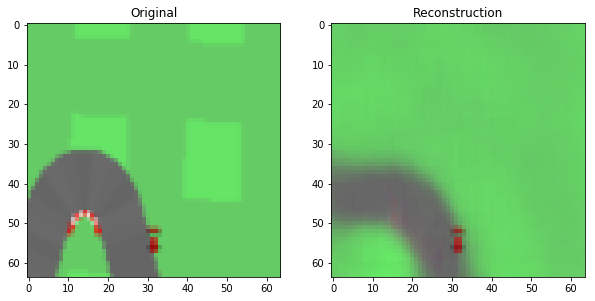

Visualise latent factor 5, original value=0.01


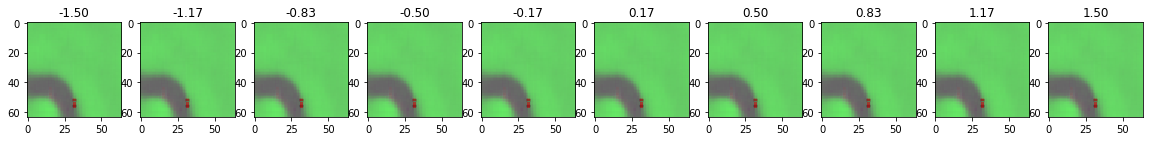

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


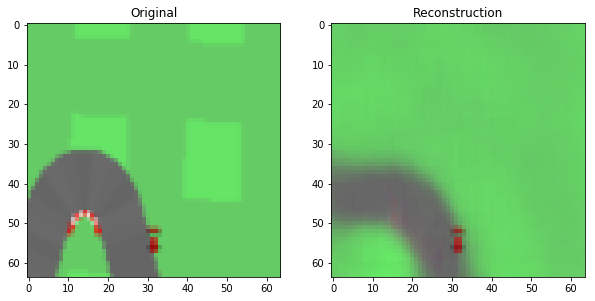

Visualise latent factor 6, original value=0.01


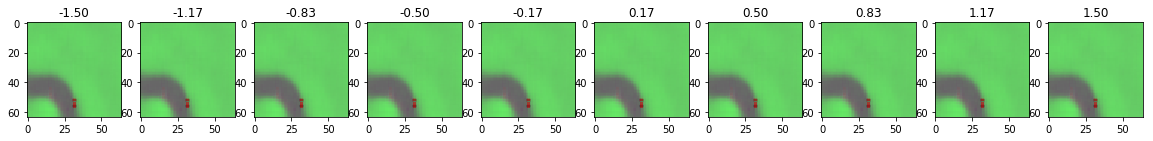

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


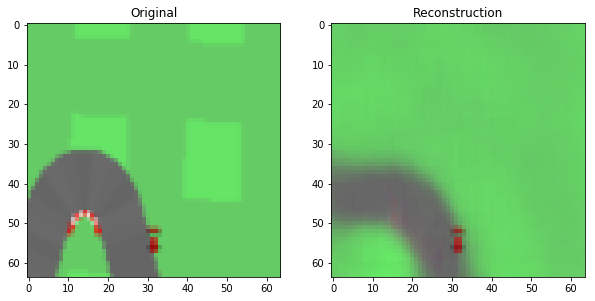

Visualise latent factor 7, original value=0.01


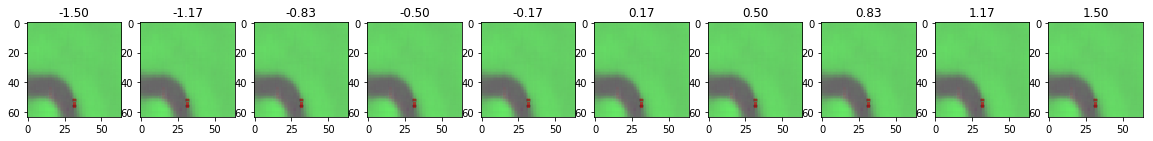

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


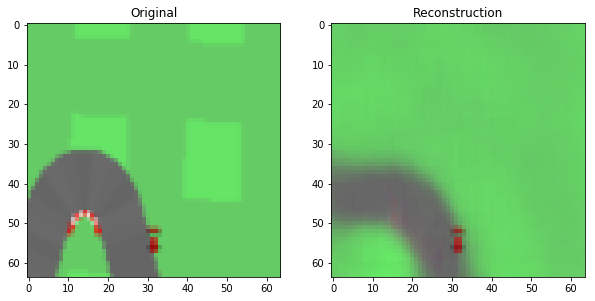

Visualise latent factor 8, original value=-0.00


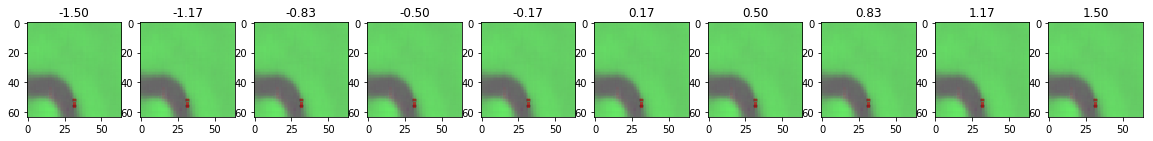

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


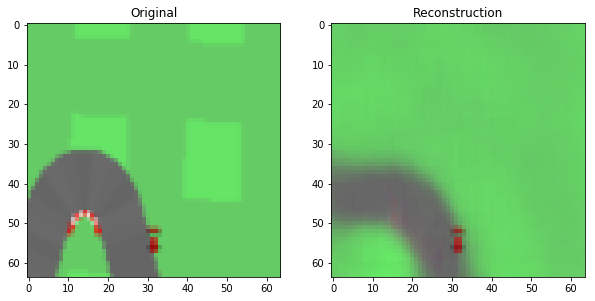

Visualise latent factor 9, original value=0.73


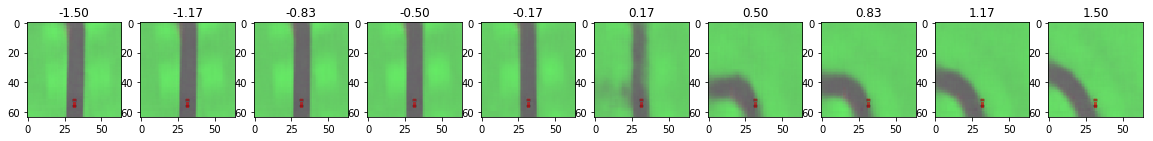

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


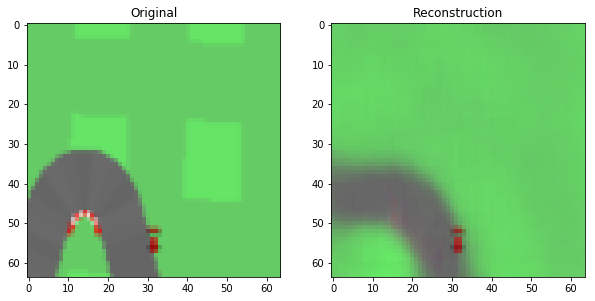

Visualise latent factor 10, original value=0.97


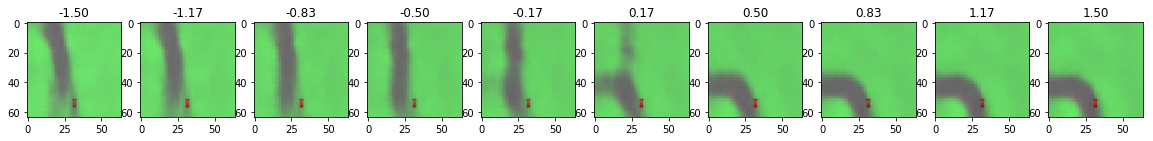

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


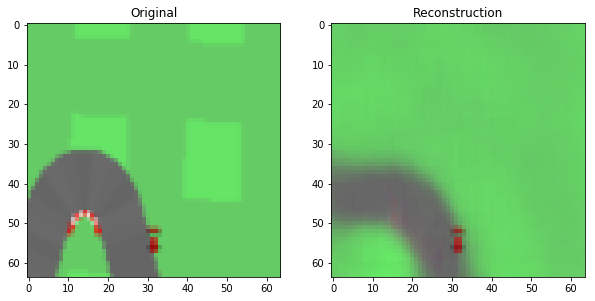

Visualise latent factor 11, original value=0.01


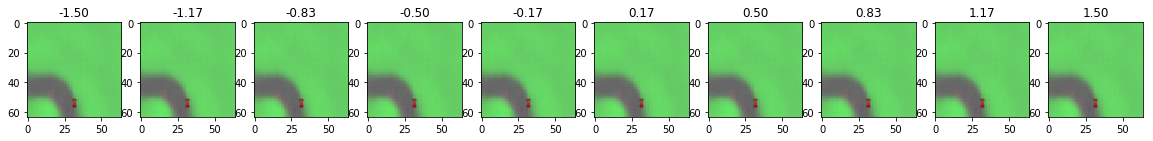

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


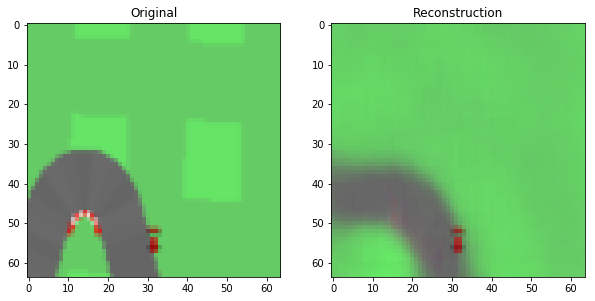

Visualise latent factor 12, original value=-0.02


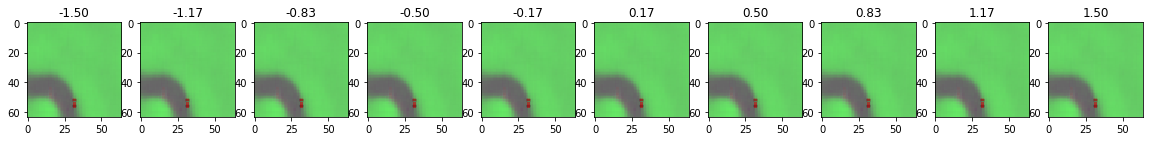

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


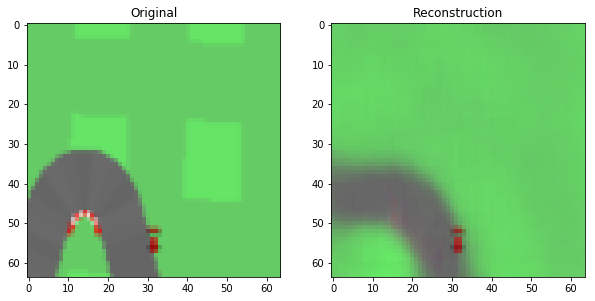

Visualise latent factor 13, original value=0.02


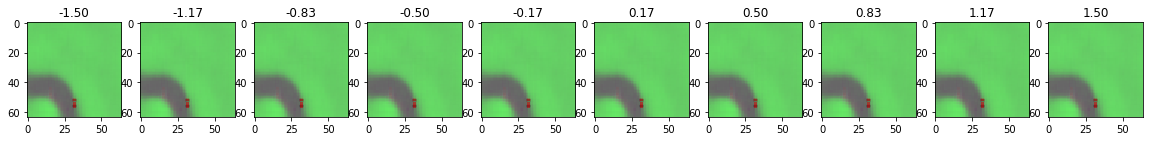

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


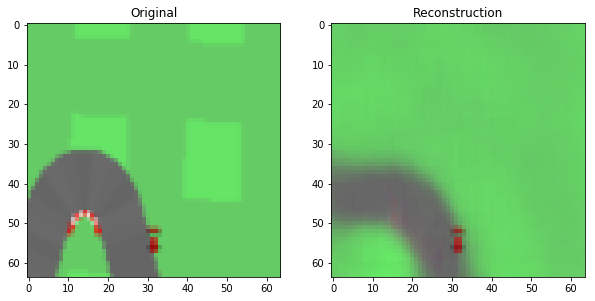

Visualise latent factor 14, original value=-0.02


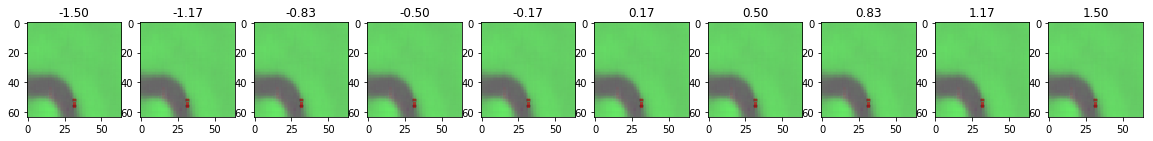

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


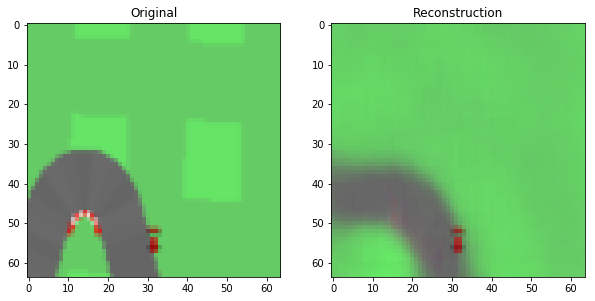

Visualise latent factor 15, original value=0.01


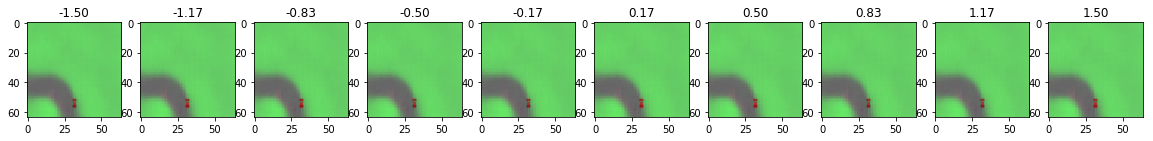

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


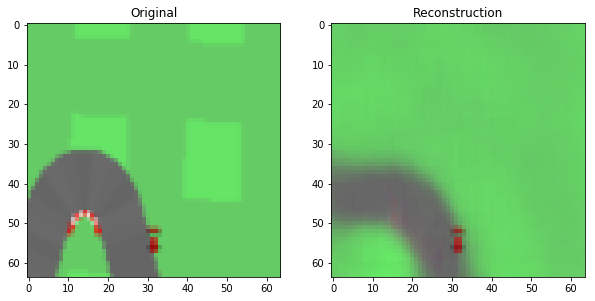

Visualise latent factor 16, original value=-0.76


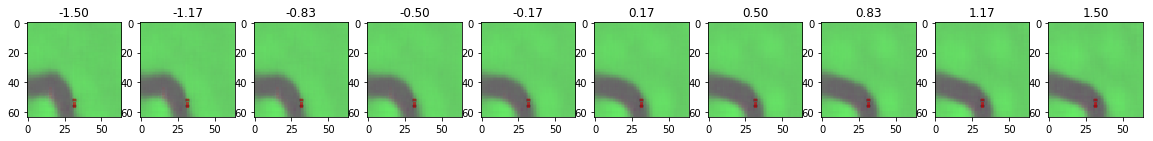

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


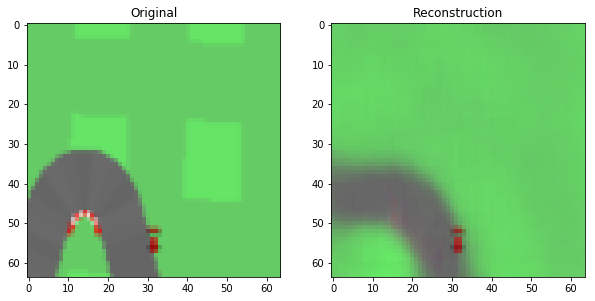

Visualise latent factor 17, original value=0.00


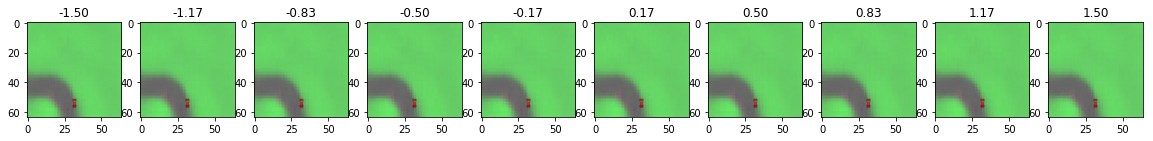

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


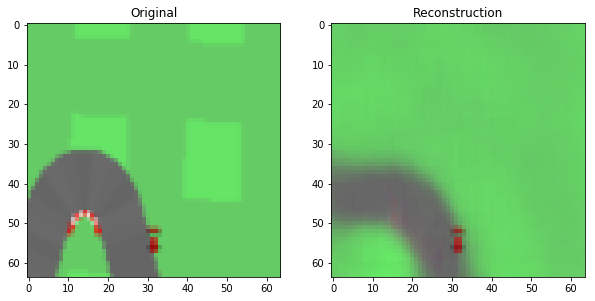

Visualise latent factor 18, original value=-0.00


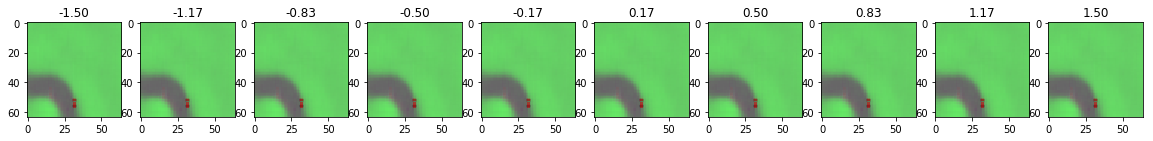

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


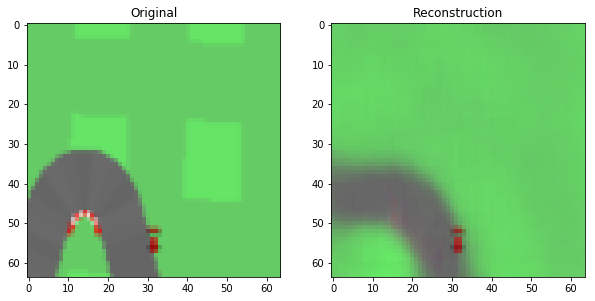

Visualise latent factor 19, original value=0.66


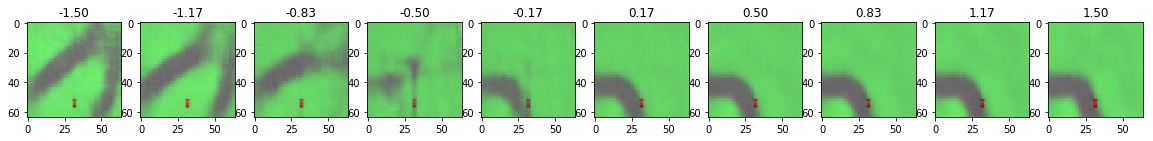

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


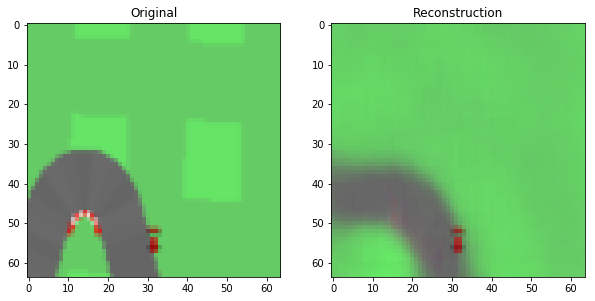

Visualise latent factor 20, original value=0.00


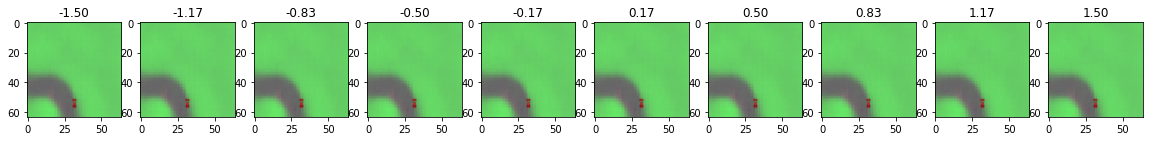

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


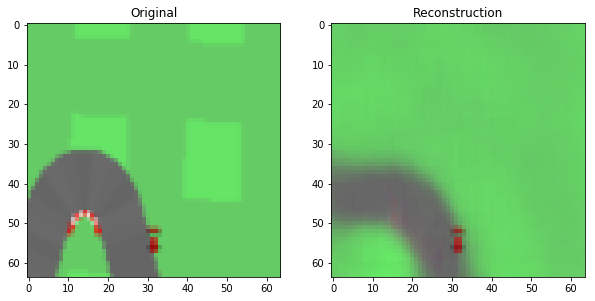

Visualise latent factor 21, original value=-0.02


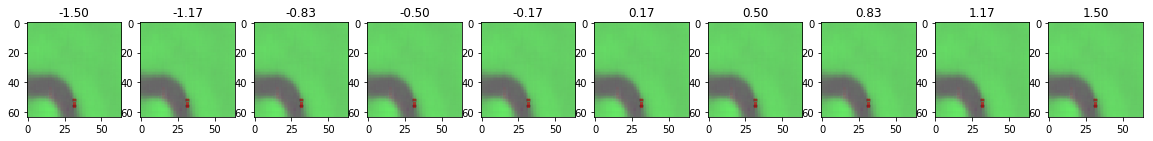

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


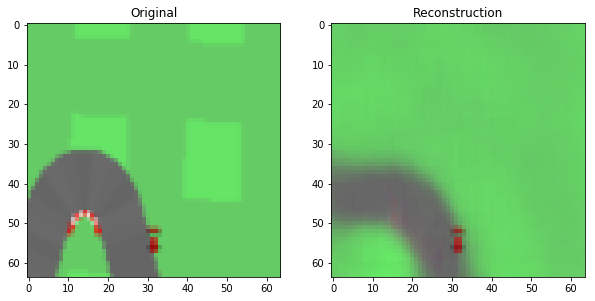

Visualise latent factor 22, original value=-0.01


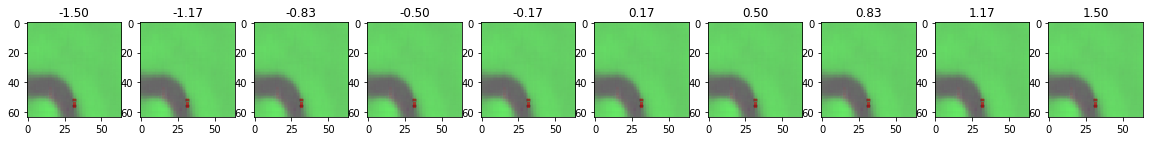

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


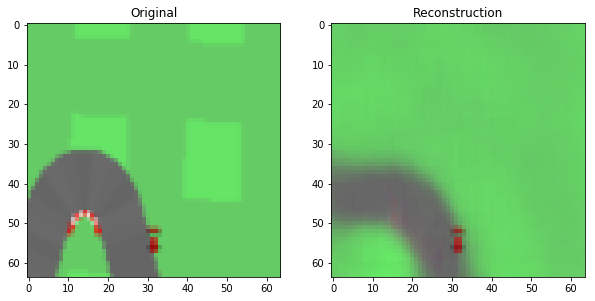

Visualise latent factor 23, original value=0.02


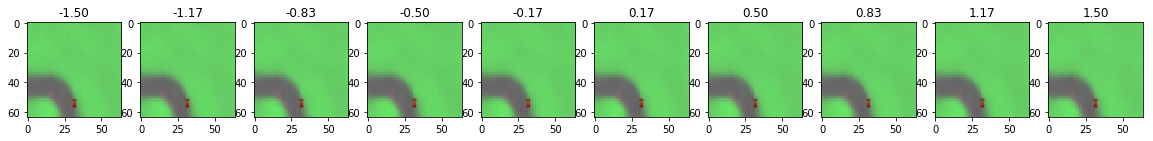

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


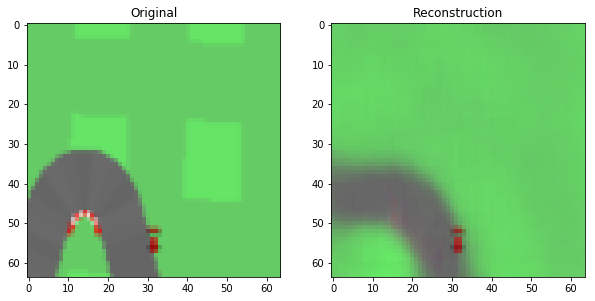

Visualise latent factor 24, original value=0.01


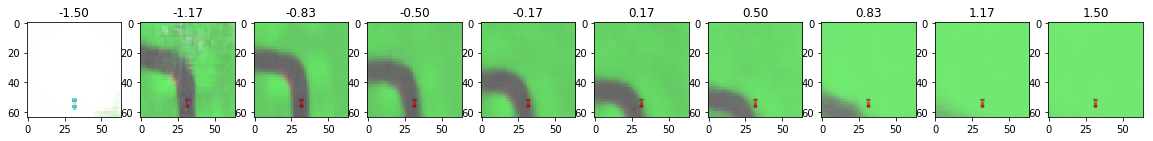

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


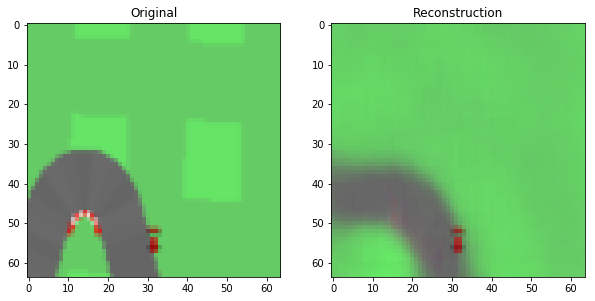

Visualise latent factor 25, original value=0.00


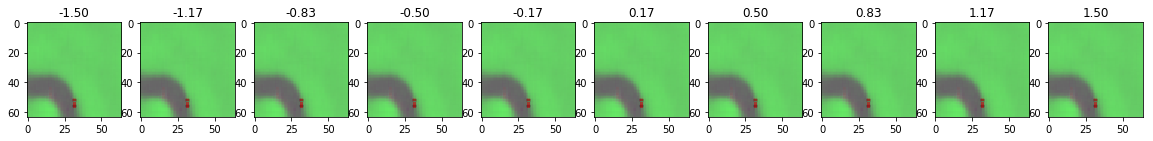

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


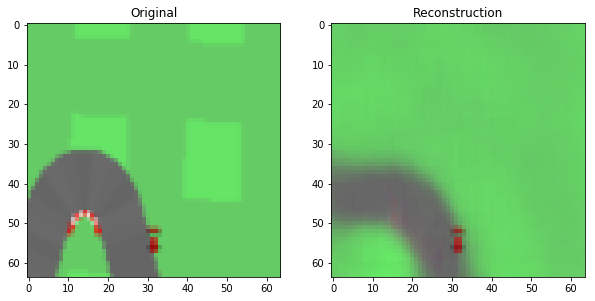

Visualise latent factor 26, original value=0.00


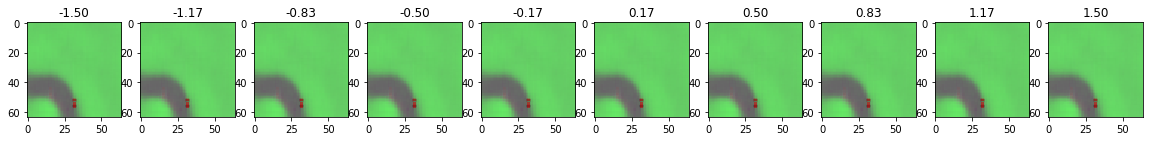

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


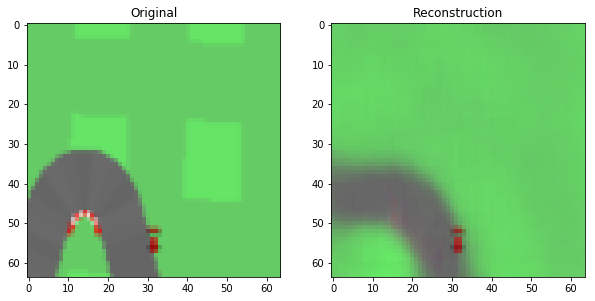

Visualise latent factor 27, original value=0.01


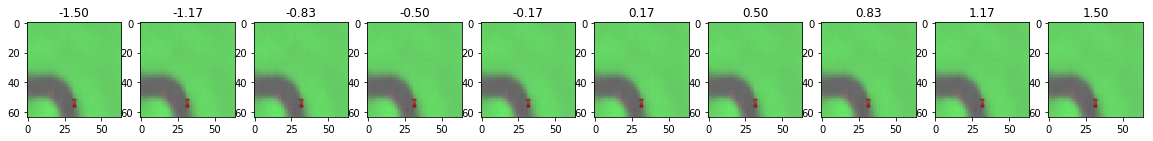

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


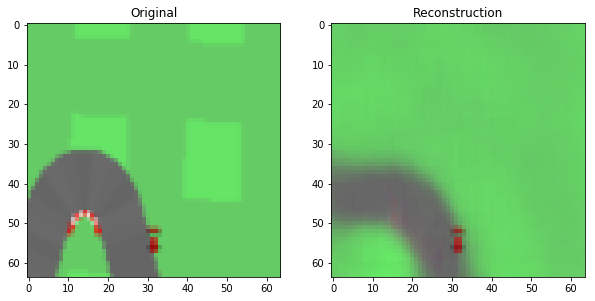

Visualise latent factor 28, original value=0.00


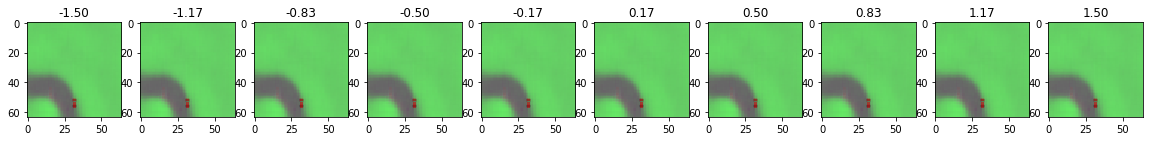

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


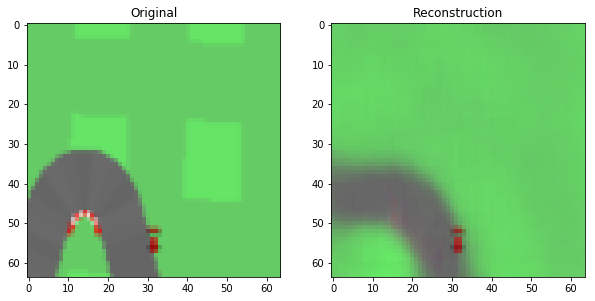

Visualise latent factor 29, original value=-0.02


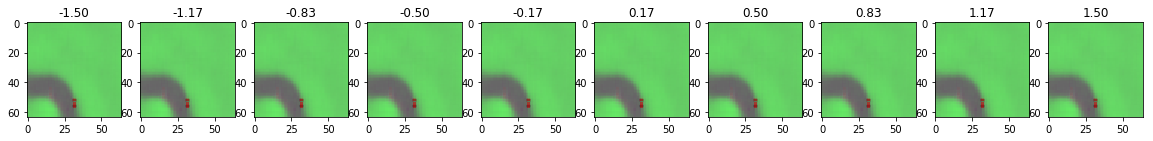

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


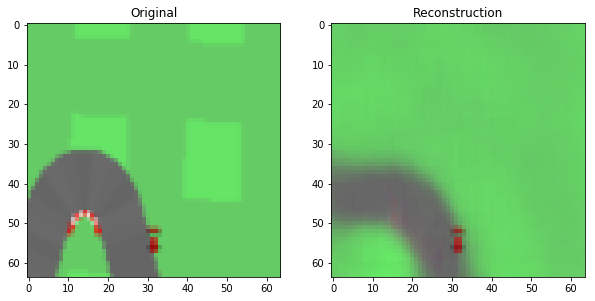

Visualise latent factor 30, original value=-0.01


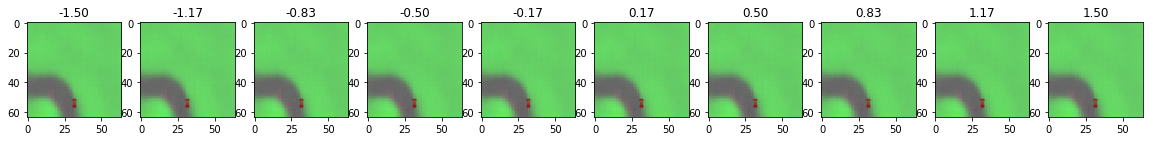

Latent vector z
[-0.0023 -0.0156 -0.0185 -0.0065 -0.0298  0.0085  0.0089  0.0113 -0.0002  0.7309  0.9722  0.0107
 -0.0163  0.018  -0.0239  0.0114 -0.758   0.0019 -0.0014  0.6599  0.0048 -0.0189 -0.0066  0.0212
  0.0051  0.0037  0.004   0.0084  0.0035 -0.0165 -0.0108 -0.0276]


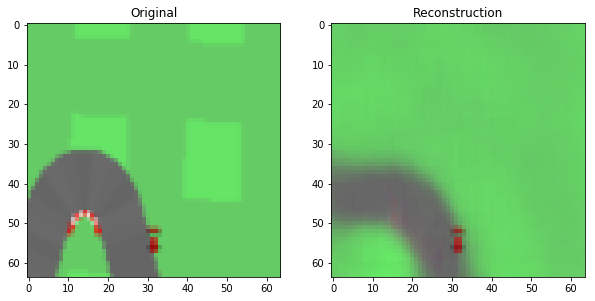

Visualise latent factor 31, original value=-0.03


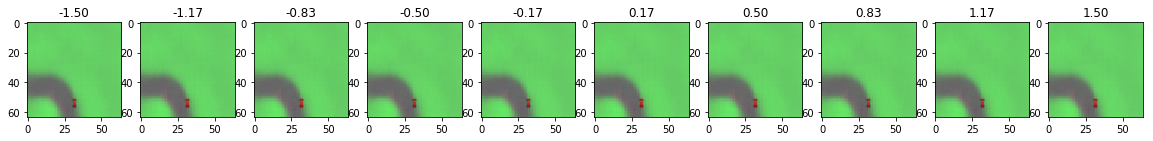

In [95]:
for i in range(32):
    plot_latent_variations(frame, beta_vae, factor=i)